In [1]:
#importing Libraries
import pandas as pd
from datetime import datetime
import time
import matplotlib.pyplot as plt

In [2]:
#Defining file path
file_to_load = 'Resources/clean_data.csv'
data = pd.read_csv(file_to_load)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128938 entries, 0 to 128937
Data columns (total 25 columns):
Unnamed: 0           128938 non-null int64
Report_No            128938 non-null int64
Reported_Date        128938 non-null object
Reported_Time        128938 non-null object
From_Date            128672 non-null object
From_Time            128553 non-null object
To_Date              49812 non-null object
To_Time              49346 non-null object
Offense              128938 non-null int64
IBRS                 127797 non-null object
Description          128938 non-null object
Beat                 128938 non-null object
Address              128911 non-null object
City                 128901 non-null object
Zip Code             128938 non-null int64
Rep_Dist             127627 non-null object
Area                 128938 non-null object
DVFlag               128938 non-null object
Invl_No              128938 non-null int64
Involvement          128938 non-null object
Race            

In [3]:
#Getting the columns needed for the analysis
cleanedData = data.loc[:, ['Reported_Date', 'Description']]

In [4]:
#Converting reported date field to type datetime
cleanedData['Reported_Date'] = pd.to_datetime(cleanedData['Reported_Date'], errors='coerce')

# Total Number of Crimes by Month

In [5]:
#Getting the total number of crimes that took place in each month,
#got the code from https://stackoverflow.com/questions/44908383/how-can-i-group-by-month-from-a-date-field-using-python-pandas
totalByMonth = cleanedData.groupby(cleanedData['Reported_Date'].dt.strftime('%B'))['Reported_Date'].count()
totalByMonth

Reported_Date
April        10418
August       11746
December      9417
February      8877
January      10191
July         11489
June         11487
March        10796
May          11693
November      9955
October      11990
September    10879
Name: Reported_Date, dtype: int64

In [6]:
#Converting the series to a dataframe to make user friendly to work with
totalByMonth_df = pd.DataFrame(totalByMonth)

In [7]:
#sorting the dataframe to list the results in sorted manner,
#got the code from https://stackoverflow.com/questions/40816144/pandas-series-sort-by-month-index
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
         'November', 'December']
totalByMonth_df.index = pd.CategoricalIndex(totalByMonth_df.index, categories=months, ordered=True)
totalByMonth_df = totalByMonth_df.sort_index()

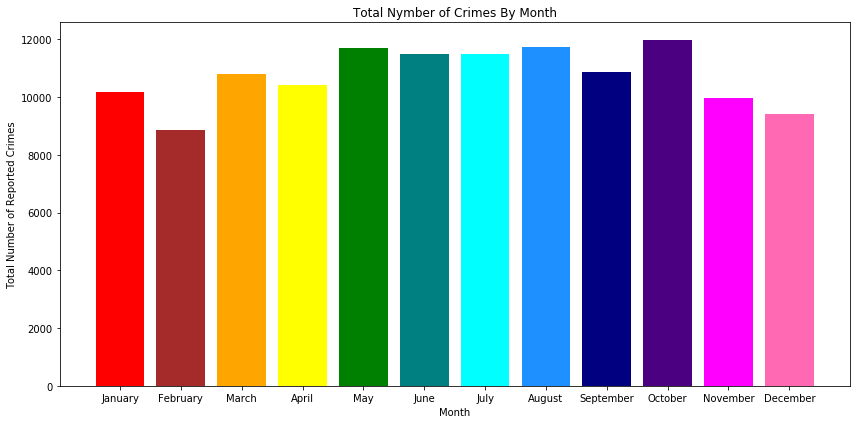

In [8]:
#Creating the plot to represent the data
colors =['red', 'brown', 'orange', 'yellow', 'green', 'teal', 'cyan', 'dodgerblue', 'navy', 'indigo', 'magenta','hotpink']
fig, ax = plt.subplots(figsize=(12,6))
totalCrimes = plt.bar(x = totalByMonth_df.index, height= totalByMonth_df['Reported_Date'], color=colors)
plt.title("Total Nymber of Crimes By Month")
plt.xlabel('Month')
plt.ylabel('Total Number of Reported Crimes')
plt.tight_layout()
plt.show()

# Types of Crimes by Month

In [93]:
copy = cleanedData
copy['Reported_Date'] = pd.to_datetime(copy['Reported_Date'], errors='coerce')
copy['Month'] =  copy['Reported_Date'].dt.strftime('%B')
copy = copy.replace({'Agg Assault - Domest': 'Aggravated Assault', 'Aggravated Assault (': 'Aggravated Assault', 'Agg Assault': 'Aggravated Assault', 'agg assault': 'Aggravated Assault',
                     'AGG ASSAULT': 'Aggravated Assault', 'Agg Assault - Drive-': 'Aggravated Assault', 'agg assault': 'Aggravated Assault', 'Arson with Fire Bomb': 'Arson', 'HOMICIDE/Non Neglige': 'Homicide',
                    'Justifiable Homicide': 'Homicide', 'Non Agg Assault Dome': 'Non Aggravated Assault', 'non aggravated assau': 'Non Aggravated Assault','Non Aggravated Assau': 'Non Aggravated Assault', 
                     'Sex Off Follow/Entic': 'Sexual Assault', 'Sex Off Fondle - mol': 'Sexual Assault', 'Sex Off Incest': 'Sexual Assault', 'Sex Off Indecent Con': 'Sexual Assault', 'Sex Off Indecent Exp': 'Sexual Assault', 
                     'Sex Off Misconduct': 'Sexual Assault', 'Sex Offense -others': 'Sexual Assault', 'Sexual Assault with': 'Sexual Assault', 'Forcible Fondling': 'Sexual Assault', 'Kidnapping/Abduction': 'Kidnapping'})
copy = copy.replace({'Auto Theft Outside S': 'Auto Theft', 'Burglary - Non Resid': 'Burglary', 'Burglary - Residence': 'Burglary', 'Business Robbery': 'Robbery', 'property damage': 'Property Damage','Stealing All Other': 'Stealing',
                     'Stealing Auto Parts': 'Stealing', 'Stealing Auto Parts/': 'Stealing', 'Stealing Bicycles': 'Stealing', 'Stealing Coin Operat': 'Stealing', 'Stealing From Auto': 'Stealing', 'Stealing Pickpocket': 'Pickpocket', 
                     'Stealing Purse Snatc': 'Snatchning', 'Stealing Shoplifting': 'Shoplifting', 'Stealing from Buildi': 'Stealing', 'Stolen Property OFFE': 'Stolen Property', 'Strong Arm Robbery': 'Armed Robbery', 
                     'Withhold Property': 'Larceny', 'stealing': 'Stealing', 'stealing from buildi': 'Stealing'})

copy

,Reported_Date,Description,Month
0,2018-09-02,Burglary,September
1,2018-01-31,Forgery,January
2,2018-01-30,Sexual Assault,January
3,2018-01-30,Burglary,January
4,2018-12-08,Property Damage,December
...,...,...,...
128933,2018-12-23,Homicide,December
128934,2018-12-27,Shoplifting,December
128935,2018-12-29,Burglary,December
128936,2018-12-25,Non Aggravated Assault,December


In [94]:
typesofCrime = copy.groupby(['Month','Description'])['Reported_Date'].count()
typesofCrime

Month      Description         
April      Aggravated Assault      891
           Armed Robbery           316
           Arson                    48
           Attempt Suicide by C      1
           Attempt Suicide by H      1
                                  ... 
September  Trespassing             313
           Violation Ex Parte O     36
           Violation Full Order     68
           Weapons Law Violatio     74
           Wire Fraud               24
Name: Reported_Date, Length: 715, dtype: int64

In [95]:
crime = pd.DataFrame(typesofCrime).reset_index()
crime

,Month,Description,Reported_Date
0,April,Aggravated Assault,891
1,April,Armed Robbery,316
2,April,Arson,48
3,April,Attempt Suicide by C,1
4,April,Attempt Suicide by H,1
...,...,...,...
710,September,Trespassing,313
711,September,Violation Ex Parte O,36
712,September,Violation Full Order,68
713,September,Weapons Law Violatio,74


In [96]:
crime = crime.pivot(index='Month', columns='Description', values='Reported_Date')
crime

Description,Accidental Drug Over,Aggravated Assault,Animal Bite - Dog,Animal Cruelty,Armed Robbery,Arson,Attempt Suicide by C,Attempt Suicide by D,Attempt Suicide by G,Attempt Suicide by H,...,Violation Ex Parte O,Violation Full Order,Weapons Law Violatio,Welfare Fraud,Wire Fraud,`,black mail,forgery,misc,misc violation
Month,,,,,,,,,,,,,,,,,,,,,
April,NaN,891.0,NaN,NaN,316.0,48.0,1.0,NaN,NaN,1.0,...,40.0,68.0,112.0,NaN,13.0,NaN,NaN,2.0,NaN,NaN
August,3.0,916.0,NaN,NaN,582.0,49.0,1.0,NaN,NaN,1.0,...,39.0,69.0,69.0,NaN,16.0,NaN,NaN,NaN,NaN,NaN
December,NaN,741.0,NaN,NaN,358.0,25.0,NaN,NaN,NaN,1.0,...,24.0,43.0,70.0,NaN,11.0,NaN,2.0,NaN,NaN,NaN
February,NaN,617.0,NaN,NaN,275.0,35.0,NaN,NaN,NaN,NaN,...,18.0,48.0,60.0,NaN,36.0,NaN,NaN,NaN,1.0,NaN
January,NaN,839.0,NaN,2.0,513.0,70.0,6.0,NaN,NaN,2.0,...,38.0,69.0,74.0,NaN,35.0,NaN,NaN,NaN,NaN,NaN
July,NaN,951.0,NaN,NaN,493.0,45.0,3.0,NaN,1.0,1.0,...,32.0,76.0,70.0,NaN,19.0,NaN,NaN,NaN,NaN,NaN
June,NaN,1072.0,1.0,5.0,429.0,36.0,3.0,NaN,NaN,NaN,...,34.0,51.0,84.0,NaN,21.0,1.0,NaN,NaN,NaN,NaN
March,NaN,851.0,NaN,1.0,430.0,36.0,5.0,1.0,NaN,NaN,...,22.0,55.0,68.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN
May,NaN,947.0,NaN,NaN,426.0,33.0,3.0,NaN,NaN,NaN,...,23.0,90.0,72.0,NaN,19.0,NaN,NaN,NaN,NaN,NaN


In [97]:
crime.columns.values

array(['Accidental Drug Over', 'Aggravated Assault', 'Animal Bite - Dog',
       'Animal Cruelty', 'Armed Robbery', 'Arson', 'Attempt Suicide by C',
       'Attempt Suicide by D', 'Attempt Suicide by G',
       'Attempt Suicide by H', 'Attempt Suicide by J',
       'Attempt Suicide by O', 'Attempt Suicide by P',
       'Attempt Suicide by S', 'Auto Theft', 'Bomb Threat/Intimida',
       'Bombing (other than', 'Bribery', 'Burglary',
       'Casualty (includes a', 'Counterfeiting', 'Credit/Debit/ATM Car',
       'Curfew', 'Dead Body', 'Disorderly Conduct',
       'Driving Under Influe', 'Drunkenness', 'Dumping (littering)',
       'Embezzlement', 'Extortion/Blackmail', 'Failure to Return',
       'False ID', 'False Information to', 'Family Disturbance',
       'Family Offense', 'Forcible Sodomy', 'Forged Checks', 'Forgery',
       'Fraud/Confidence Gam', 'Gambling - Possessio',
       'Hacking/Computer Inv', 'Hit and Run of a Per', 'Homicide',
       'Human Trafficking/Co', 'Identity The

In [98]:
# month = crime['Month']
# for num, month in enumerate(month):
#     values = list(crime[crime['Month'] == month].loc[:, 'Value'])

#     crime[crime['Month'] == month].plot.bar(x=crime['Description'],y=crime['Reported_Date'], ax=ax, stacked=True, 
#                                     bottom = margin_bottom, color=colors[num], label=month)
#     margin_bottom += values
# plt.show()

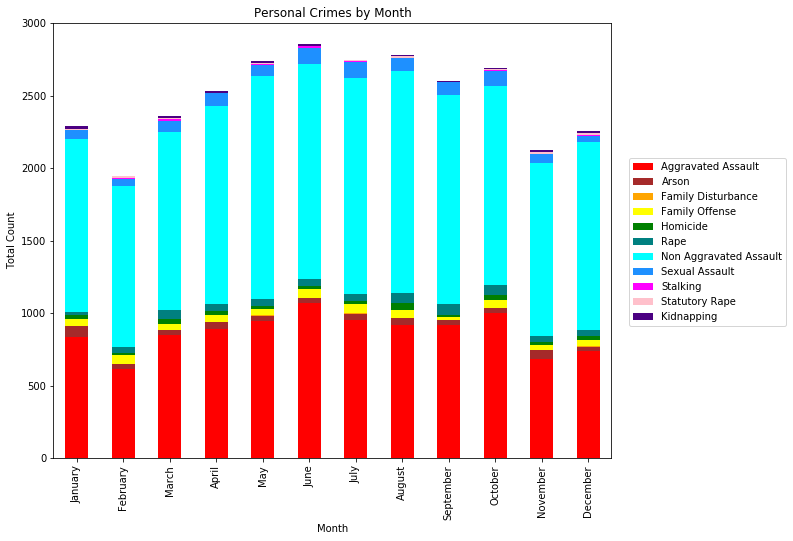

In [104]:
#Creating the Visual for the Personal Crime Category

#Defining a list that contains the types of Personal Crimes
personalCrimes = ['Aggravated Assault', 'Arson', 'Family Disturbance', 'Family Offense', 'Homicide', 'Rape','Non Aggravated Assault', 
                 'Sexual Assault', 'Stalking', 'Statutory Rape', 'Kidnapping']
Col =['red', 'brown', 'orange', 'yellow', 'green', 'teal', 'cyan', 'dodgerblue', 'magenta','pink', 'indigo']

pCrimes = crime.loc[months, personalCrimes].plot.bar(stacked=True, figsize=(10,8), color=Col)

#Setting the legend to best fit the graph, got the code from https://stackoverflow.com/questions/43272206/python-legend-overlaps-with-the-pie-chart
pCrimes.legend(bbox_to_anchor=(1.15,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)

#Setting title, x-label and y-label
pCrimes.set_title('Personal Crimes by Month')
pCrimes.set_xlabel('Month')
pCrimes.set_ylabel('Total Count')
plt.show()

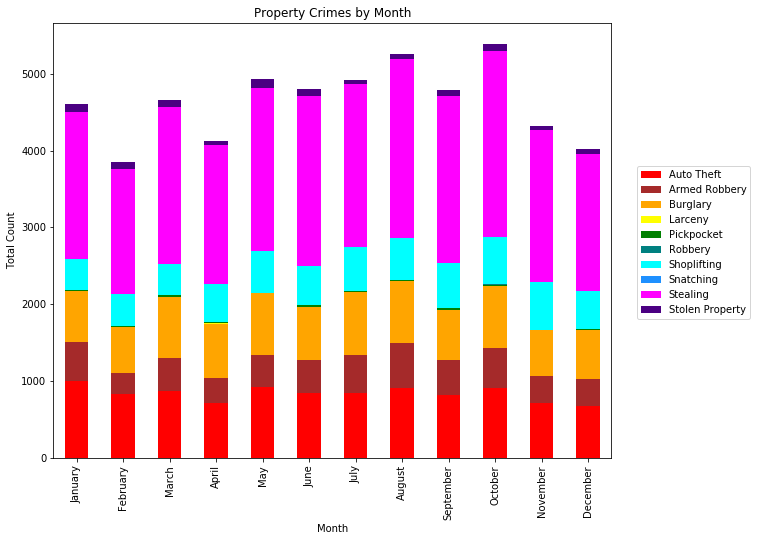

In [100]:
propertyCrimes = ['Auto Theft', 'Armed Robbery', 'Burglary', 'Larceny', 'Pickpocket', 'Robbery', 'Shoplifting', 
                  'Snatching', 'Stealing', 'Stolen Property']
Col =['red', 'brown', 'orange', 'yellow', 'green', 'teal', 'cyan', 'dodgerblue', 'magenta','indigo']
propCrimes = crime.loc[months, propertyCrimes].plot.bar(stacked=True, figsize=(10,8), color=Col)

#Setting the legend to best fit the graph, got the code from https://stackoverflow.com/questions/43272206/python-legend-overlaps-with-the-pie-chart
propCrimes.legend(bbox_to_anchor=(1.1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)

#Setting title, x-label and y-label
propCrimes.set_title('Property Crimes by Month')
propCrimes.set_xlabel('Month')
propCrimes.set_ylabel('Total Count')
plt.show()